In [1]:
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3920396)

C:\Users\fredd\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [2]:
df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_card', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_shot_saved_off_target',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pas

In [3]:
df = df[df['type'] == 'Pass']

In [4]:
df[['x', 'y']] = df['location'].apply(pd.Series)

In [7]:
df['pass_outcome'].head(50)

6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
12    NaN
15    NaN
16    NaN
17    NaN
18    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
53    NaN
54    NaN
55    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
65    NaN
66    NaN
Name: pass_outcome, dtype: object

In [6]:
df = df[df['pass_outcome'].isna()] #keep NaN rows

Text(0.5, 1.0, 'AFCON 20203 | Ghana Starting Successful Pass Locations vs Egypt')

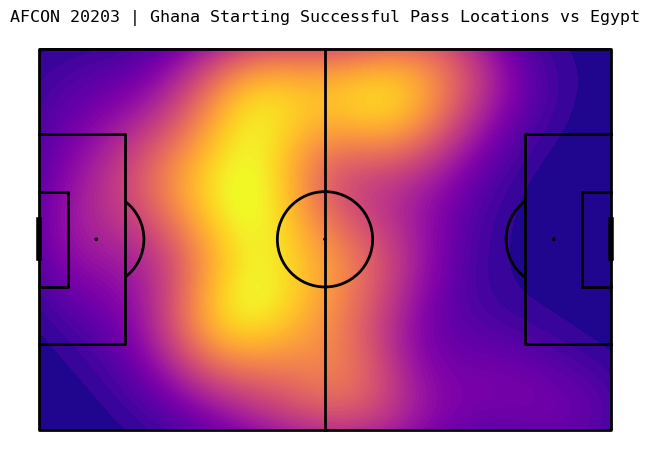

In [14]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='white',
              line_color='black', line_zorder=2)

fig, ax = pitch.draw()

#filter Ghana(4885) passes; Egypt(774)
df_arg = df[df['team_id'] == 4885]

kde = pitch.kdeplot(
    df_arg.x,
    df_arg.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma'
)

ax.set_title('AFCON 20203 | Ghana Starting Successful Pass Locations vs Egypt', fontfamily='monospace')